# Consumers Purchase Intention Towards Online Shopping
## SECTION 3 - MACHINE LEARNING MODEL BUILDING

***The goal of this section is to build and selecting the best model to predict Revenue Generated or Not from Customer's Online Purchasing from E-Commerce.*** 

In order to achieve this goal, we will be focusing on searching the best model using some conditions below : 

- First, we split the data into 80% Train data and then we split the data into 90% Train data.


- Then we scale the data so that the're having the same scale.


- In each attempts we will be conducting the Logistic Regression, Random Forrest Classifier, Decision Tree Classifier and KNearest Neighbors Models.


- Also we try to do the hyperparameter tuning then compare it between it's default models.


- In last part we compare the result between models to achieve our goals.

### IMPORT LIBRARIES

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import statsmodels.api as sm
import pylab

from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.model_selection import learning_curve, ValidationCurve
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn import metrics

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [329]:
df = pd.read_csv('Final Project Clean.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Data Preprocessing

Text(0.5, 1.0, 'PageValues')

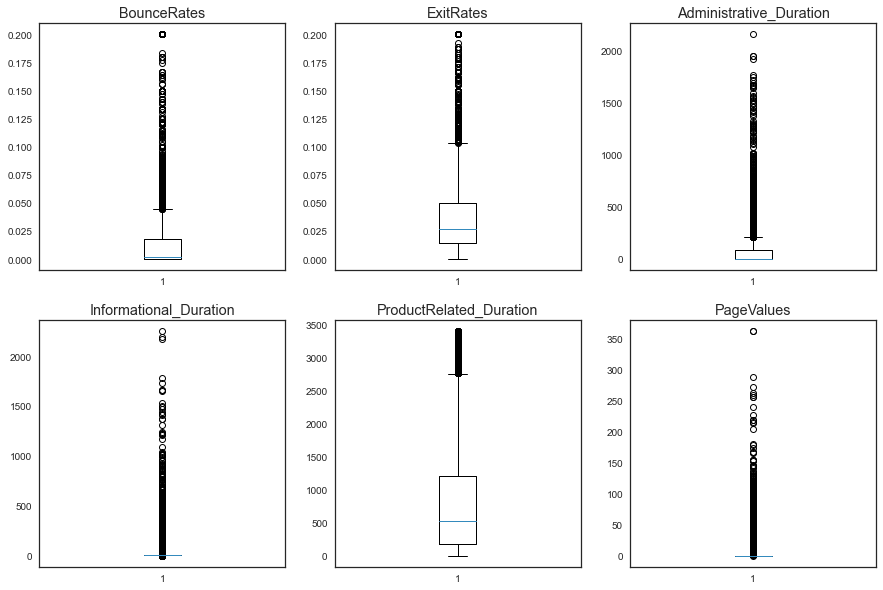

In [330]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(df['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(df['PageValues'])
ax.set_title('PageValues')

In [331]:
numerics =['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerics:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

Text(0.5, 1.0, 'ProductRelated_Duration')

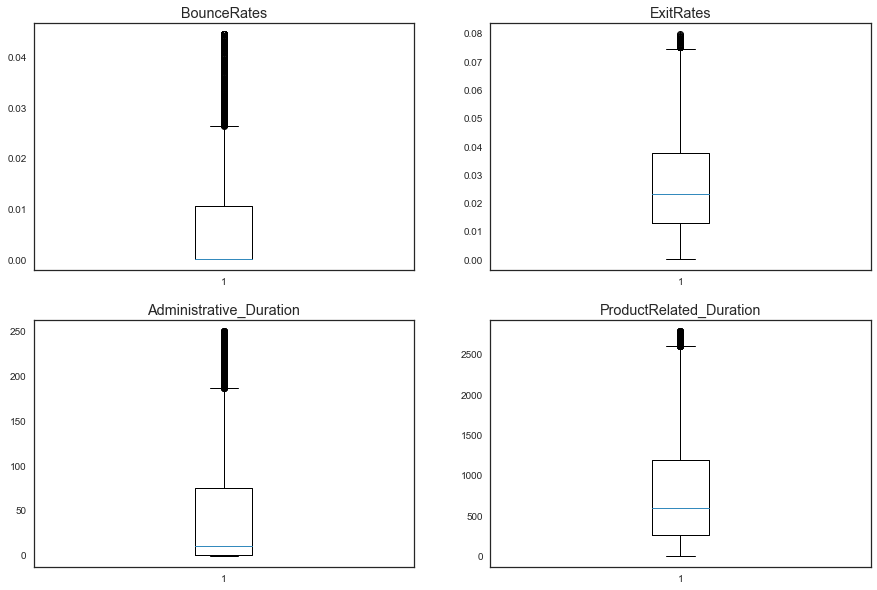

In [332]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(222)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(223)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(224)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

### Label Encoding

In [333]:
# one hot encoding 

data = pd.get_dummies(df)

data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [334]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
df['Revenue'] = laben.fit_transform(data['Revenue'])
df['Revenue'].value_counts()

0    7068
1    1348
Name: Revenue, dtype: int64

In [335]:
# label encoding of Weekend

from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
df['Weekend'] = laben.fit_transform(data['Weekend'])
df['Weekend'].value_counts()

0    6387
1    2029
Name: Weekend, dtype: int64

In [336]:
df.loc[df['SpecialDay'] > 0.4, 'SpecialDay'] = 1
df.loc[df['SpecialDay'] <= 0.4, 'SpecialDay'] = 0
df['SpecialDay'].value_counts()

0.0    7906
1.0     510
Name: SpecialDay, dtype: int64

In [337]:
df['SpecialDay']=df['SpecialDay'].astype('bool')
df['SpecialDay'].value_counts()

False    7906
True      510
Name: SpecialDay, dtype: int64

In [338]:
# label encoding of SpecialDay
laben = LabelEncoder()
df['SpecialDay'] = laben.fit_transform(data['SpecialDay'])
df['SpecialDay'].value_counts()

0    7640
3     226
4     190
2     146
1     120
5      94
Name: SpecialDay, dtype: int64

In [339]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    df[cols] = df[cols].astype('category')

In [340]:
df.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                    int64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                       int64
Revenue                       int64
dtype: object

### SCALING

> Scaling means changing the range of the values of the datas. However the shape of the distribution doesn’t change. We do this so that our Models are having better prformance, as it can help features arrive in more digestible form for these algorithms. Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale. 

> To scale our datas, there are some scaling methods we can choose according to their conditions. Typically there are :

> To scale our datas, there are some scaling methods we can choose according to their conditions. Typically there are :

> - Standard Scaler : This method removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values.

> - Min Max Scaler : This method rescales the data set such that all feature values are in the range of 0 to 1. However, this scaling is very sensitive to the presence of outliers.


> - Robust Scaler : Robust scaler centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [341]:
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
variable_categories =['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


scaling = [col for col in df.columns if col not in variable_categories]

# using StandardScaler
scaler = StandardScaler()
scaler.fit(df[scaling])

StandardScaler()

In [342]:
df_scaled = pd.concat([df[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[scaling]), columns=scaling)],
                    axis=1)
df_scaled.head(3)

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,0,10,0,3,3,1,Feb,4,Returning_Visitor,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,0,19,0,2,2,1,Feb,3,Returning_Visitor,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,0,3,2,2,4,1,Feb,2,Returning_Visitor,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718


In [343]:
encoded_features=['Month','VisitorType']

df_label = df_scaled.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    df_label[col] = label_encoder.fit_transform(df_scaled[col])
    
df_label.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,0,10,0,3,3,1,2,4,2,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,0,19,0,2,2,1,2,3,2,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,0,3,2,2,4,1,2,2,2,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718
3,0,0,0,0,3,0,1,1,3,2,3,2,-0.726592,-0.222449,-0.586821,-0.644714,2.248235,-0.325718
4,0,0,0,0,16,2,1,1,4,2,3,2,-0.726592,-0.222449,-0.568098,1.192070,-0.052426,-0.325718


In [344]:
df_label.dtypes

Weekend                       int64
Revenue                       int64
Administrative             category
Informational              category
ProductRelated             category
SpecialDay                    int64
OperatingSystems           category
Browser                    category
Region                     category
Month                         int64
TrafficType                category
VisitorType                   int64
Administrative_Duration     float64
Informational_Duration      float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
dtype: object

In [345]:
# getting dependent and independent variables

x = data
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = df['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (8416, 28)
Shape of y: (8416,)


In [346]:
df_80 = df_label.copy()

In [347]:
X = df_80.drop(columns = ['Revenue'])
y = df_80['Revenue'].values

In [348]:
X.head()

,Weekend,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,10,0,3,3,1,2,4,2,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,19,0,2,2,1,2,3,2,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,3,2,2,4,1,2,2,2,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718
3,0,0,0,3,0,1,1,3,2,3,2,-0.726592,-0.222449,-0.586821,-0.644714,2.248235,-0.325718
4,0,0,0,16,2,1,1,4,2,3,2,-0.726592,-0.222449,-0.568098,1.192070,-0.052426,-0.325718


### FITTING MODEL

In [349]:
#Split train data 80%, test data 20%
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, random_state = 42)

#Model
LRG = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)
DTC = DecisionTreeClassifier().fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)

### HYPERPARAMETER

> Now we will set our Hyperparameter tuned model. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the models performed better by using this method. As mentioned, the tune process of Hyperparameter will be on separate notebook. Below we apply the best tuned parameters to our hyperparameter version of each models.

In [350]:
# applying model with hyperparameter
LRG_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(X_train, y_train)
RFC_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_depth = 10).fit(X_train, y_train)
DTC_best = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1).fit(X_train, y_train)
KNN_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 18).fit(X_train, y_train)

In [351]:
# train data
LRG_score_tr = LRG.score(X_train,y_train)
RFC_score_tr = RFC.score(X_train,y_train)
DTC_score_tr = DTC.score(X_train,y_train)
KNN_score_tr = KNN.score(X_train,y_train)
LRG_best_score_tr = LRG_best.score(X_train,y_train)
RFC_best_score_tr = RFC_best.score(X_train,y_train)
DTC_best_score_tr = DTC_best.score(X_train,y_train)
KNN_best_score_tr = KNN_best.score(X_train,y_train)

In [352]:
# test data
LRG_score = LRG.score(X_test,y_test)
RFC_score = RFC.score(X_test,y_test)
DTC_score = DTC.score(X_test,y_test)
KNN_score = KNN.score(X_test,y_test)
LRG_best_score = LRG_best.score(X_test,y_test)
RFC_best_score = RFC_best.score(X_test,y_test)
DTC_best_score = DTC_best.score(X_test,y_test)
KNN_best_score = KNN_best.score(X_test,y_test)

In [353]:
model80_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                    'Normal': [LRG_score_tr, RFC_score_tr, DTC_score_tr, KNN_score_tr], 
                                    'Hyper' : [LRG_best_score_tr, RFC_best_score_tr, DTC_best_score_tr, KNN_best_score_tr]})

In [354]:
model80_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                   'Normal': [LRG_score, RFC_score, DTC_score, KNN_score], 
                                   'Hyper' : [LRG_best_score, RFC_best_score, DTC_best_score, KNN_best_score]})

In [355]:
pd.concat([model80_train_score, model80_test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.890969  0.873737
            1   RandomForest  1.000000  0.946376
            2   DecisionTree  1.000000  1.000000
            3    KNNeighbors  0.880125  0.849079
Test Score  0  LogRegression  0.899050  0.882423
            1   RandomForest  0.905582  0.910926
            2   DecisionTree  0.864014  0.860451
            3    KNNeighbors  0.862233  0.856295

> Seeing the test score result, we can see that our models indeed performed better using Hyperparameter, therefore we'll use hyperparameter model for our prediction. But before that, by comparing our Train and Test Scores we can see that maybe there are some overfitting in our data especially on Random Forest and Decision Tree method. So I'll try to check it with ***cross validation*** before we continue to the next step.

In [356]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
LRG_kfold = cross_val_score(LRG_best, X_train, y_train, cv = cv, scoring = 'accuracy')
RFC_kfold = cross_val_score(RFC_best, X_train, y_train, cv = cv, scoring = 'accuracy')
DTC_kfold = cross_val_score(DTC_best, X_train, y_train, cv = cv, scoring = 'accuracy')
KNN_kfold = cross_val_score(KNN_best, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG Kfold cross-val' : LRG_kfold.tolist(),
              'RFC Kfold cross-val' : RFC_kfold.tolist(),
              'DTC kfold cross-val' : DTC_kfold.tolist(),
              'KNN Kfold cross-val' : KNN_kfold.tolist()})

,LRG Kfold cross-val,RFC Kfold cross-val,DTC kfold cross-val,KNN Kfold cross-val
0,0.872404,0.912463,0.854599,0.841246
1,0.869436,0.885757,0.848665,0.845697
2,0.881129,0.922734,0.852897,0.848440
3,0.878158,0.895988,0.872214,0.845468
4,0.876672,0.919762,0.860327,0.843982
5,0.866270,0.891530,0.873700,0.846954
6,0.866270,0.903418,0.864785,0.849926
7,0.876672,0.915305,0.872214,0.857355
8,0.878158,0.897474,0.858841,0.842496
9,0.876672,0.924220,0.875186,0.851412


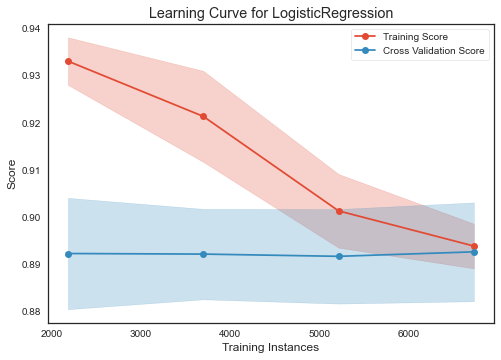

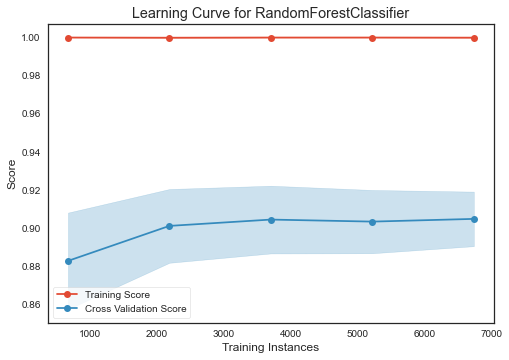

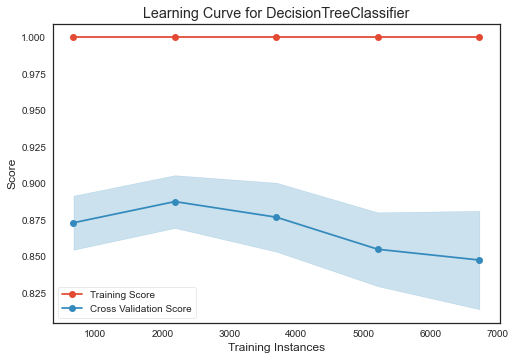

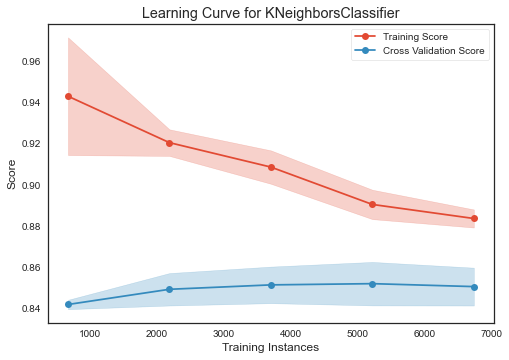

In [357]:
curve = [LRG, RFC, DTC, KNN]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

>These are the learning curve for train data, above are for default parameter, while below are for the hyperparameter tuned model.

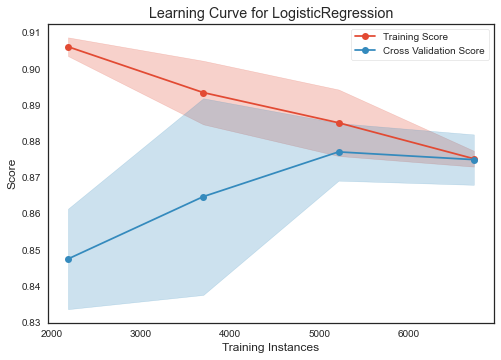

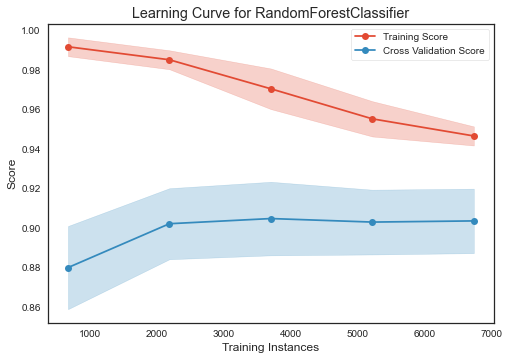

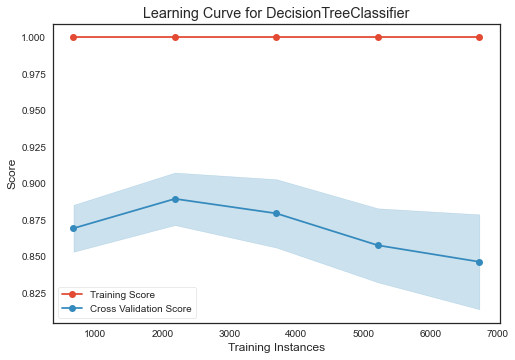

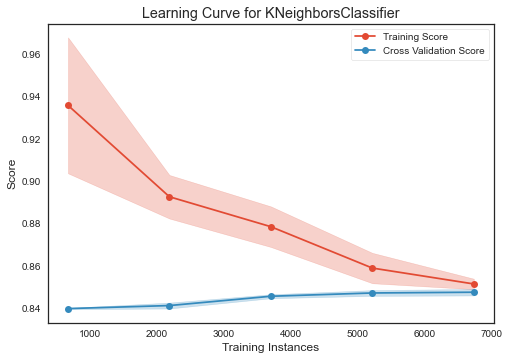

In [358]:
curve = [LRG_best, RFC_best, DTC_best, KNN_best]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

In [359]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree','KNNeighbors'], 
              'Normal': [LRG_score_tr, RFC_score_tr, DTC_score_tr, KNN_score_tr],
              'Kfold ': [LRG_kfold.mean(), RFC_kfold.mean(), DTC_kfold.mean(), KNN_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.890969,0.874184
1,RandomForest,1.000000,0.906865
2,DecisionTree,1.000000,0.863343
3,KNNeighbors,0.880125,0.847298


> So, by using 5 times cross validation to compare our previous score with the kfold score, it seems that we can see ovefitting on our Random Forest and Decision Tree model, while the other two are rather stable. But for now let's continue to next process, we will apply our model to predict the test data.

### PREDICT

In [360]:
#Logistic Regression
yp_LRG = LRG_best.predict(X_test)

#Random Forest
yp_RFC = RFC_best.predict(X_test)

#Decision Tree
yp_DTC = DTC_best.predict(X_test)

#KNNeighbors
yp_KNN = KNN_best.predict(X_test)

### MODEL PERFORMANCE EVALUATION

> Below, we will begin evaluating our models starting from Logistic Regression, then Random Forest, Desicion Tree and lastly the KNN model.

#### Logistic Regression

> In theory, Logistic Regression method uses a logistic function to frame binary output model. The output of the logistic regression will be a probability (0≤x≤1), and can be used to predict the binary 0 or 1 as the output.

In [361]:
# evaluation matrix for LogisticRegression
cm_LRG = confusion_matrix(y_test, yp_LRG)
cm_LRG

array([[1410,   16],
       [ 182,   76]])

In [362]:
labels = ['Revenue No Generated', 'Revenue Generated']

                      precision    recall  f1-score   support

Revenue No Generated       0.89      0.99      0.93      1426
   Revenue Generated       0.83      0.29      0.43       258

            accuracy                           0.88      1684
           macro avg       0.86      0.64      0.68      1684
        weighted avg       0.88      0.88      0.86      1684



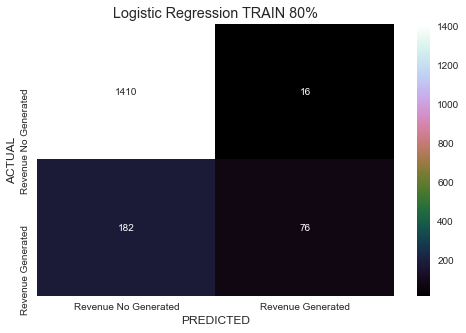

In [363]:
print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax, cmap = 'cubehelix')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Actually by seeing the data from the confusion matrix above, we can see that maybe our data is likely unbalanced. Therefore maybe in the end after comparing our result we can try to re-balance the data using oversampling or undersampling method. For now it's a good result and let's just focus on building the models. I also put the classification report into **report_LRG** so that in the summary section we can call it back and concatenate it with other reports.

In [364]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names= labels, output_dict=True)).T

#### Random Forest Classifier

> Moving on to the next model, Random forests. It's esentially are a learning method for classification, regression and other tasks that operate by constructing a multitude of Decision Trees. While Decision Tree is a tree based algorithm used to solve regression and classification problems. An inverted tree is framed which is branched off from a homogeneous probability distributed root node, to highly heterogeneous leaf nodes, for deriving the output. Random Forest models are actually better performed with unscaled data, so maybe after we've done the process, we'll do this model againts the best model we later get in this Machine Learning section.

In [365]:
# confusion matrix for RandomForestClassifier
cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[1386,   40],
       [ 110,  148]])

                      precision    recall  f1-score   support

Revenue No Generated       0.93      0.97      0.95      1426
   Revenue Generated       0.79      0.57      0.66       258

            accuracy                           0.91      1684
           macro avg       0.86      0.77      0.81      1684
        weighted avg       0.91      0.91      0.91      1684



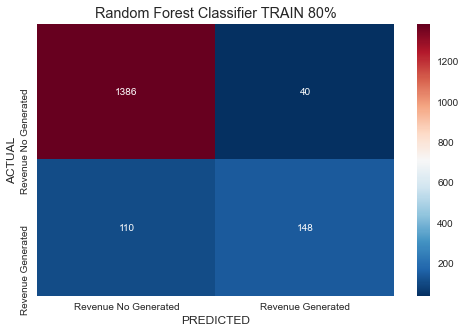

In [366]:
print(classification_report(y_test, yp_RFC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax, cmap = 'RdBu_r')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

>We've done with the Random Forest, next we will store the report into report_RFC and moving to last model in this 80% Train data category.

In [367]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

#### Decision Tree

> Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for classification problems too. In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [368]:
# confusion matrix for Decision Tree
cm_DTC = confusion_matrix(y_test, yp_DTC)
cm_DTC

array([[1297,  129],
       [ 106,  152]])

                      precision    recall  f1-score   support

Revenue No Generated       0.92      0.91      0.92      1426
   Revenue Generated       0.54      0.59      0.56       258

            accuracy                           0.86      1684
           macro avg       0.73      0.75      0.74      1684
        weighted avg       0.87      0.86      0.86      1684



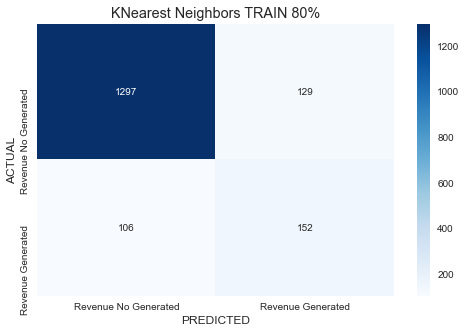

In [369]:
print(classification_report(y_test, yp_DTC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_DTC, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Alright, it seems that we've done all the modelling for our 80% Train category. Now I'll store the report in **report_KNN**. Then we move to the next category, the 90% Train data.

In [370]:
report_DTC = pd.DataFrame(classification_report(y_test, yp_DTC, target_names= labels, output_dict=True)).T

#### K-Nearest Neighbors

> K-Nearest Neighbors is one of the most easy ML technique used. The logic behind KNN is to explore the data's nearest neighbor, assume the test datapoint to be similar to them and derive the output. In case of KNN classification, a majority voting is applied over the k nearest datapoints.

In [371]:
# confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, yp_KNN)
cm_KNN

array([[1424,    2],
       [ 240,   18]])

                      precision    recall  f1-score   support

Revenue No Generated       0.86      1.00      0.92      1426
   Revenue Generated       0.90      0.07      0.13       258

            accuracy                           0.86      1684
           macro avg       0.88      0.53      0.53      1684
        weighted avg       0.86      0.86      0.80      1684



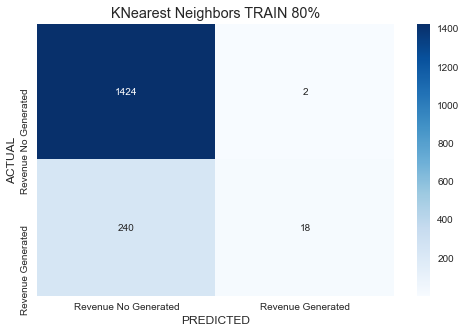

In [372]:
print(classification_report(y_test, yp_KNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Alright, it seems that we've done all the modelling for our 80% Train category. Now I'll store the report in **report_KNN**. Then we move to the next category, the 90% Train data.

In [373]:
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

>From default models above, we can see RandomForestClassifer has the best cross validation score and best model score with train & test data. Therefore, we choose it as our prediction model. Let's try tuning the hyperparameter to get the better result.

#### Random Forest with Hyperparameter Tuning

Let's build a random forest classifier model with hyperparameter tuning

Now we will set our Hyperparameter tuned model. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the models performed better by using this method. As mentioned, the tune process of Hyperparameter will be on separate notebook. Below we apply the best tuned parameters to our hyperparameter version of each models.

##### RANDOMSEARCHCV

In [87]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
rand_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                 "randomforestclassifier__min_samples_leaf":[1, 2, 4],
                 "randomforestclassifier__min_samples_split":[2, 5, 10],
                 "randomforestclassifier__n_estimators": [200, 400, 600, 800, 1000, 1400, 1800],
                 "randomforestclassifier__bootstrap": [True,False]}]
#Randomsearch of the pipeline, the fit the best model
randomsearch = RandomizedSearchCV(pipe, rand_param, cv=5, verbose=0,n_jobs=-1) # Fit random search
best_model = randomsearch.fit(X_train,y_train)

In [88]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=1400))])
The mean accuracy of the model is: 0.9091448931116389


###### Fitting all the parameters to the model

Let's fit all the parameters we derived by hyperparameter tuning into the actual model

In [410]:
rs = RandomForestClassifier(max_depth=10, n_estimators=1400)
rs.fit(X_train,y_train)
y_rs = rs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_rs))

Accuracy: 0.9109263657957245


In [411]:
# confusion matrix for Random Forest Model with Hyperparameter Tuning RandomSearchCV
cm_rfc_rs1 = confusion_matrix(y_test, y_rs)
cm_rfc_rs1

array([[1385,   41],
       [ 109,  149]])

                      precision    recall  f1-score   support

Revenue No Generated       0.93      0.97      0.95      1426
   Revenue Generated       0.78      0.58      0.67       258

            accuracy                           0.91      1684
           macro avg       0.86      0.77      0.81      1684
        weighted avg       0.91      0.91      0.91      1684



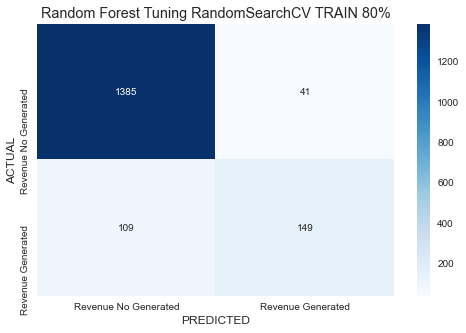

In [412]:
print(classification_report(y_test, y_rs, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_rfc_rs1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Tuning RandomSearchCV TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [413]:
report_RS = pd.DataFrame(classification_report(y_test, y_rs, target_names= labels, output_dict=True)).T

We have got 91% accuracy. Great!

##### GRIDSEARCHCV

In [93]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
#Gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

We have fitted the model by creating a list for all parameters and we will be evaluating based on cross validation

In [94]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=25, max_leaf_nodes=10,
                                        min_samples_leaf=15,
                                        n_estimators=1000))])
The mean accuracy of the model is: 0.9026128266033254


We have got the best parameters for the model and the mean accuracy is 90.2%

###### Fitting all the parameters to the model

Let's fit all the parameters we derived by hyperparameter tuning into the actual model

In [414]:
rt = RandomForestClassifier(max_depth=25, max_leaf_nodes=10,
                                        min_samples_leaf=15,
                                        n_estimators=1000)
rt.fit(X_train,y_train)
ygc_pred = rt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, ygc_pred))

Accuracy: 0.9032066508313539


In [415]:
# confusion matrix for Random Forest Model with Hyperparameter Tuning GridSearchCV
cm_rfc_gs1 = confusion_matrix(y_test, ygc_pred)
cm_rfc_gs1

array([[1400,   26],
       [ 137,  121]])

                      precision    recall  f1-score   support

Revenue No Generated       0.91      0.98      0.94      1426
   Revenue Generated       0.82      0.47      0.60       258

            accuracy                           0.90      1684
           macro avg       0.87      0.73      0.77      1684
        weighted avg       0.90      0.90      0.89      1684



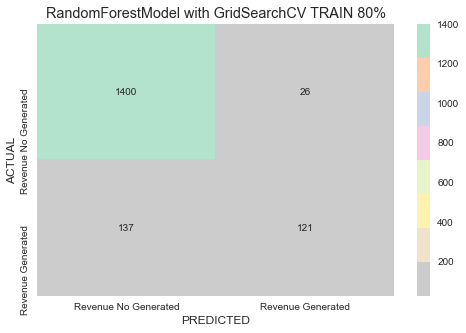

In [416]:
print(classification_report(y_test, ygc_pred, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_rfc_gs1, annot=True, fmt=".0f", ax=ax, cmap = 'Pastel2_r')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('RandomForestModel with GridSearchCV TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

We have got 90% accuracy. Great!

In [380]:
report_GS = pd.DataFrame(classification_report(y_test, ygc_pred, target_names= labels, output_dict=True)).T

### Splitting Data - Train 90%

> In general, the procedures on this category are pretty much the same as the 80% Train datas, the only difference is on this category we'll split the data into 90% Train and 10% Test data. Since the procedures are same, I would not explain the details as the explanations would also be repetitive and the same as above. 

In [381]:
df_90 = df_label.copy()

In [382]:
X1 = df_90.drop(columns = ['Revenue'])
y1 = df_90['Revenue'].values

In [383]:
X1.head()

,Weekend,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,10,0,3,3,1,2,4,2,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,19,0,2,2,1,2,3,2,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,3,2,2,4,1,2,2,2,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718
3,0,0,0,3,0,1,1,3,2,3,2,-0.726592,-0.222449,-0.586821,-0.644714,2.248235,-0.325718
4,0,0,0,16,2,1,1,4,2,3,2,-0.726592,-0.222449,-0.568098,1.192070,-0.052426,-0.325718


#### FITTING MODEL

In [384]:
#Split Train 90%
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y1, train_size = 0.9, random_state = 42)

#Model
LRG1 = LogisticRegression().fit(X1_train, y1_train)
RFC1 = RandomForestClassifier().fit(X1_train, y1_train)
DTC1 = DecisionTreeClassifier().fit(X1_train, y1_train)
KNN1 = KNeighborsClassifier().fit(X1_train, y1_train)

#### HYPERPARAMETER

In [385]:
LRG1_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 100).fit(X1_train, y1_train)
RFC1_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = 10).fit(X1_train, y1_train)
DTC1_best = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1).fit(X_train, y_train)
KNN1_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 39).fit(X1_train, y1_train)

In [386]:
# train

LRG1_score_tr = LRG1.score(X1_train,y1_train)
RFC1_score_tr = RFC1.score(X1_train,y1_train)
DTC1_score_tr = DTC.score(X1_train,y1_train)
KNN1_score_tr = KNN1.score(X1_train,y1_train)
LRG1_best_score_tr = LRG1_best.score(X1_train,y1_train)
RFC1_best_score_tr = RFC1_best.score(X1_train,y1_train)
DTC1_best_score_tr = DTC1_best.score(X1_train,y1_train)
KNN1_best_score_tr = KNN1_best.score(X1_train,y1_train)

In [387]:
# test

LRG1_score = LRG1.score(X1_test,y1_test)
RFC1_score = RFC1.score(X1_test,y1_test)
DTC1_score = DTC.score(X1_train,y1_train)
KNN1_score = KNN1.score(X1_test,y1_test)
LRG1_best_score = LRG1_best.score(X1_test,y1_test)
RFC1_best_score = RFC1_best.score(X1_test,y1_test)
DTC1_best_score = DTC1.score(X1_train,y1_train)
KNN1_best_score = KNN1_best.score(X1_test,y1_test)

In [388]:
model90_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                   'Normal': [LRG1_score_tr, RFC1_score_tr, DTC1_score_tr, KNN1_score_tr],
                                   'Hyper' : [LRG1_best_score_tr, RFC1_best_score_tr, DTC1_best_score_tr, KNN1_best_score_tr]})

In [389]:
model90_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                   'Normal': [LRG1_score, RFC1_score, DTC1_score, KNN1_score],
                                   'Hyper' : [LRG1_best_score, RFC1_best_score, DTC1_best_score, KNN1_best_score]})

In [390]:
pd.concat([model90_train_score, model90_test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.893451  0.893847
            1   RandomForest  1.000000  0.953525
            2   DecisionTree  0.986665  0.986929
            3    KNNeighbors  0.883153  0.850409
Test Score  0  LogRegression  0.894299  0.895487
            1   RandomForest  0.903800  0.897862
            2   DecisionTree  0.986665  1.000000
            3    KNNeighbors  0.855107  0.853919

> Note that in this category, we can also see that the model are overfitting. I'll try to use cross validation once again.

In [391]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)
LRG1_kfold = cross_val_score(LRG_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')
RFC1_kfold = cross_val_score(RFC_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')
DTC1_kfold = cross_val_score(DTC_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')
KNN1_kfold = cross_val_score(KNN_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG Kfold cross-val' : LRG1_kfold.tolist(),
              'RFC Kfold cross-val' : RFC1_kfold.tolist(),
              'DTC Kfold cross-val' : DTC1_kfold.tolist(),
              'KNN Kfold cross-val' : KNN1_kfold.tolist()})

,LRG Kfold cross-val,RFC Kfold cross-val,DTC Kfold cross-val,KNN Kfold cross-val
0,0.871287,0.915512,0.870627,0.846865
1,0.882508,0.912871,0.867327,0.846205
2,0.873267,0.908251,0.862046,0.849505
3,0.875248,0.914191,0.864026,0.841584
4,0.876486,0.902906,0.870542,0.846103


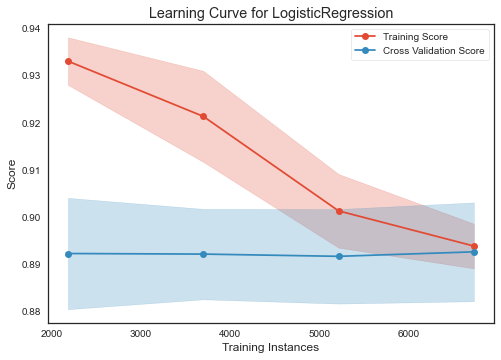

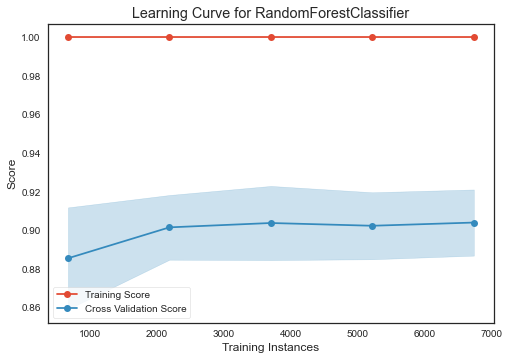

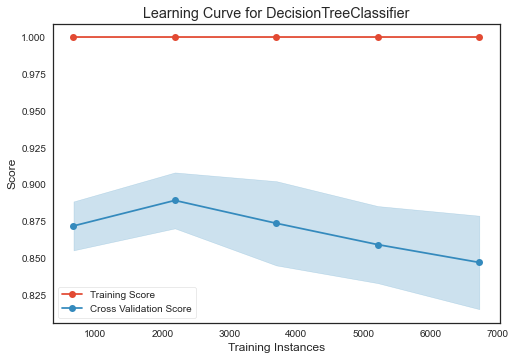

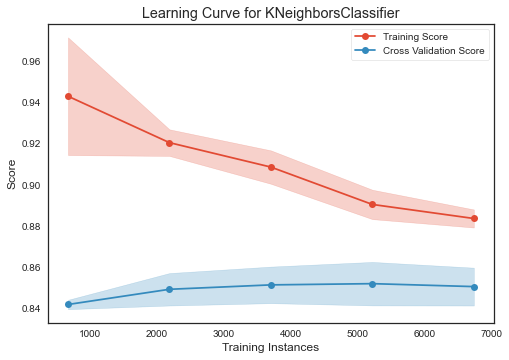

In [392]:
curve = [LRG1, RFC1, DTC1, KNN1]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

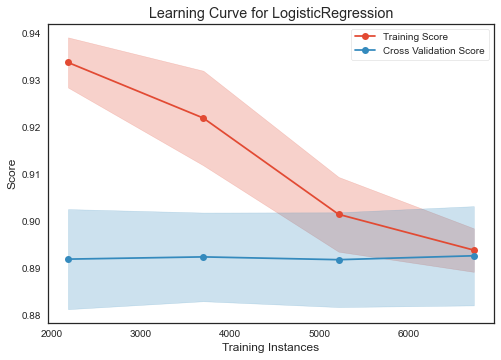

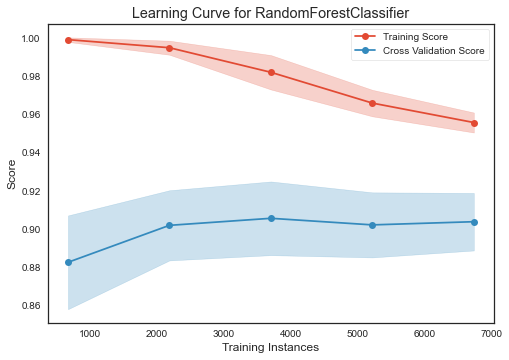

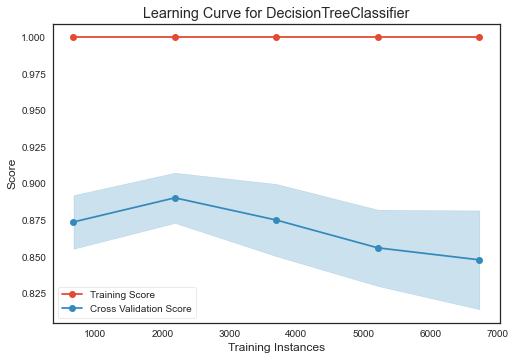

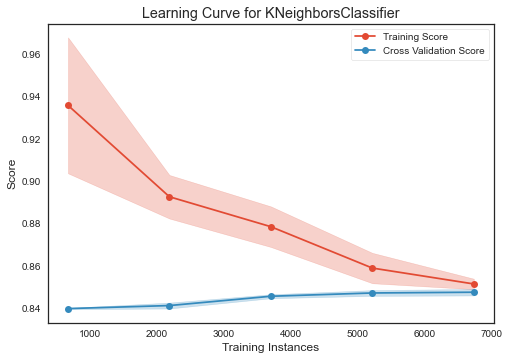

In [393]:
curve = [LRG1_best, RFC1_best, DTC1_best, KNN1_best]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

In [394]:
pd.DataFrame({'Model' : ['LogRegression','RandomForest','DecisionTree','KNNeighbors'], 
              'Normal': [LRG1_score_tr, RFC1_score_tr, DTC1_score_tr, KNN1_score_tr],
              'Kfold ': [LRG1_kfold.mean(), RFC1_kfold.mean(), DTC1_kfold.mean(), KNN1_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.893451,0.875759
1,RandomForest,1.000000,0.910746
2,DecisionTree,0.986665,0.866914
3,KNNeighbors,0.883153,0.846052


> From `learning_curve()` and the mean Kfold above, we can see that there are clearly overfitting on Random Forest as well as on KNN model, but on KNN it's only slightly. But let's continue to see the model prediction and model evaluation.

#### PREDICT

In [395]:
#Logistic Regression
yp_LRG1 = LRG1_best.predict(X1_test)

#Random Forest
yp_RFC1 = RFC1_best.predict(X1_test)

#Decision Tree
yp_DTC1 = DTC1_best.predict(X1_test)

#KNNeighbors
yp_KNN1 = KNN1_best.predict(X1_test)

### MODEL PERFORMANCE EVALUATION

#### Logistic Regression

In [396]:
# confusion matrix for LogisticRegression
cm_LRG1 = confusion_matrix(y1_test, yp_LRG1)
cm_LRG1

array([[690,  20],
       [ 68,  64]])

                      precision    recall  f1-score   support

Revenue No Generated       0.91      0.97      0.94       710
   Revenue Generated       0.76      0.48      0.59       132

            accuracy                           0.90       842
           macro avg       0.84      0.73      0.77       842
        weighted avg       0.89      0.90      0.89       842



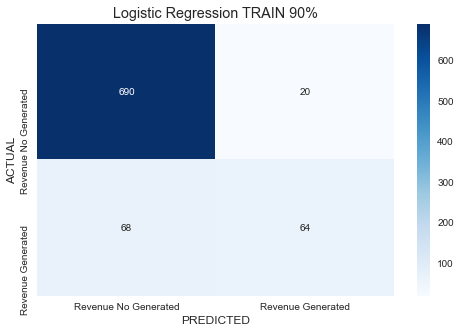

In [397]:
print(classification_report(y1_test, yp_LRG1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [398]:
report_LRG1 = pd.DataFrame(classification_report(y1_test, yp_LRG1, target_names= labels, output_dict=True)).T

#### Random Forest Classifier

In [399]:
# confusion matrix for RandomForestClassifier
cm_RFC1 = confusion_matrix(y1_test, yp_RFC1)
cm_RFC1

array([[680,  30],
       [ 56,  76]])

                      precision    recall  f1-score   support

Revenue No Generated       0.92      0.96      0.94       710
   Revenue Generated       0.72      0.58      0.64       132

            accuracy                           0.90       842
           macro avg       0.82      0.77      0.79       842
        weighted avg       0.89      0.90      0.89       842



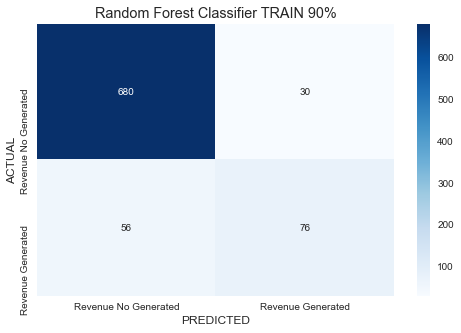

In [400]:
print(classification_report(y1_test, yp_RFC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [401]:
report_RFC1 = pd.DataFrame(classification_report(y1_test, yp_RFC1, target_names= labels, output_dict=True)).T

#### Decision Tree

In [402]:
# confusion matrix for DecisionTree
cm_DTC1 = confusion_matrix(y1_test, yp_DTC1)
cm_DTC1

array([[638,  72],
       [ 55,  77]])

                      precision    recall  f1-score   support

Revenue No Generated       0.92      0.90      0.91       710
   Revenue Generated       0.52      0.58      0.55       132

            accuracy                           0.85       842
           macro avg       0.72      0.74      0.73       842
        weighted avg       0.86      0.85      0.85       842



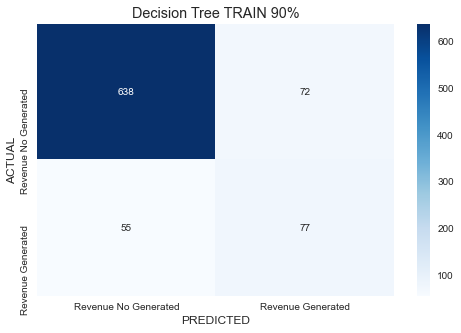

In [403]:
print(classification_report(y1_test, yp_DTC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_DTC1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Decision Tree TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [404]:
report_DTC1 = pd.DataFrame(classification_report(y1_test, yp_DTC1, target_names= labels, output_dict=True)).T

#### K-Nearest Neighbors

In [405]:
# confusion matrix for KNN
cm_KNN1 = confusion_matrix(y1_test, yp_KNN1)
cm_KNN1

array([[709,   1],
       [122,  10]])

                      precision    recall  f1-score   support

Revenue No Generated       0.85      1.00      0.92       710
   Revenue Generated       0.91      0.08      0.14       132

            accuracy                           0.85       842
           macro avg       0.88      0.54      0.53       842
        weighted avg       0.86      0.85      0.80       842



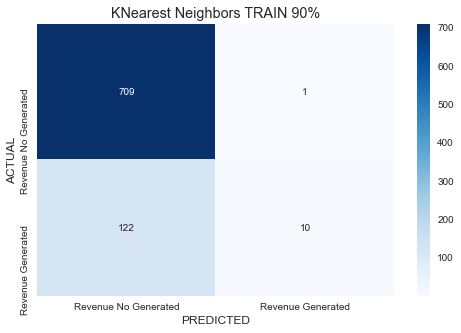

In [406]:
print(classification_report(y1_test, yp_KNN1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [417]:
report_KNN1 = pd.DataFrame(classification_report(y1_test, yp_KNN1, target_names= labels, output_dict=True)).T

#### Random Forest with Hyperparameter Tuning

##### RANDOMSEARCHCV

In [128]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
rand_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                 "randomforestclassifier__min_samples_leaf":[1, 2, 4],
                 "randomforestclassifier__min_samples_split":[2, 5, 10],
                 "randomforestclassifier__n_estimators": [200, 400, 600, 800, 1000, 1400, 1800],
                 "randomforestclassifier__bootstrap": [True,False]}]
#Randomsearch of the pipeline, the fit the best model
randomsearch = RandomizedSearchCV(pipe, rand_param, cv=5, verbose=0,n_jobs=-1) # Fit random search
best_model = randomsearch.fit(X1_train,y1_train)

In [129]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X1_test,y1_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=90, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=1000))])
The mean accuracy of the model is: 0.9026128266033254


###### Fitting all the parameters to the model

In [418]:
rs = RandomForestClassifier(max_depth=90, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=1000)
rs.fit(X1_train,y1_train)
ygs_pred = rs.predict(X1_test)
rs_result1 = metrics.accuracy_score(y1_test, ygs_pred)
rs_result1

0.8990498812351544

In [419]:
# confusion matrix for Random Forest Model with Hyperparameter Tuning RandomSearchCV
cm_rfc_rs = confusion_matrix(y1_test, ygs_pred)
cm_rfc_rs

array([[678,  32],
       [ 53,  79]])

                      precision    recall  f1-score   support

Revenue No Generated       0.93      0.95      0.94       710
   Revenue Generated       0.71      0.60      0.65       132

            accuracy                           0.90       842
           macro avg       0.82      0.78      0.80       842
        weighted avg       0.89      0.90      0.90       842



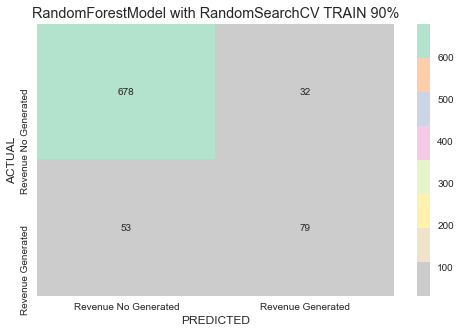

In [420]:
print(classification_report(y1_test, ygs_pred, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_rfc_rs, annot=True, fmt=".0f", ax=ax, cmap = 'Pastel2_r')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('RandomForestModel with RandomSearchCV TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [421]:
report_RS1 = pd.DataFrame(classification_report(y1_test, ygs_pred, target_names= labels, output_dict=True)).T

##### GRIDSEARCHCV

In [134]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
#Gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X1_train,y1_train)

In [135]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X1_test,y1_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_leaf_nodes=10))])
The mean accuracy of the model is: 0.8954869358669834


###### Fitting all the parameters to the model

In [422]:
rt = RandomForestClassifier(max_leaf_nodes=10)
rs.fit(X1_train,y1_train)
ygc1_pred = rs.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, ygc1_pred))

Accuracy: 0.9026128266033254


In [423]:
# confusion matrix for Random Forest Model with Hyperparameter Tuning GridSearchCV
cm_rfc_gs = confusion_matrix(y1_test, ygc1_pred)
cm_rfc_gs

array([[680,  30],
       [ 52,  80]])

                      precision    recall  f1-score   support

Revenue No Generated       0.93      0.96      0.94       710
   Revenue Generated       0.73      0.61      0.66       132

            accuracy                           0.90       842
           macro avg       0.83      0.78      0.80       842
        weighted avg       0.90      0.90      0.90       842



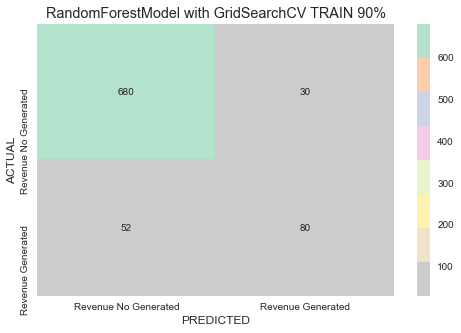

In [424]:
print(classification_report(y1_test, ygc1_pred, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_rfc_gs, annot=True, fmt=".0f", ax=ax, cmap = 'Pastel2_r')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('RandomForestModel with GridSearchCV TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [426]:
report_GC1 = pd.DataFrame(classification_report(y1_test, ygc1_pred, target_names= labels, output_dict=True)).T

### MODEL SUMMARY

>Now, we will summarize our findings. But before that, we must answer the question I mentioned before. 
What is a Confusion Matrix ? What does it implies ? A confusion matrix is simply a table that is often used to describe the performance of a classification model on a set of test data. 

> Let's now define the most basic terms in this matrix :

> - True Positives (TP): Cases in which are predicted as *positives* and in reality are also *positives*.


> - True Negatives (TN): Cases in which are predicted as *negatives* and in reality are also *negatives*.


> - False Positives (FP): Cases in which are predicted as *positives*, but in reality are *negatives*.


> - False Negatives (FN): Cases in which are predicted as *negatives*, but in reality are *positives*.

> This is a list of rates that are often computed from a confusion matrix for a binary classifier:

> - Accuracy : Overall, how often is the classifier correct?


> - Recall : When it's actually true, how often does it predict as true ?


> - Precision : When it predicts true, how often is it correct ?

#### Logistic Regression Comparison

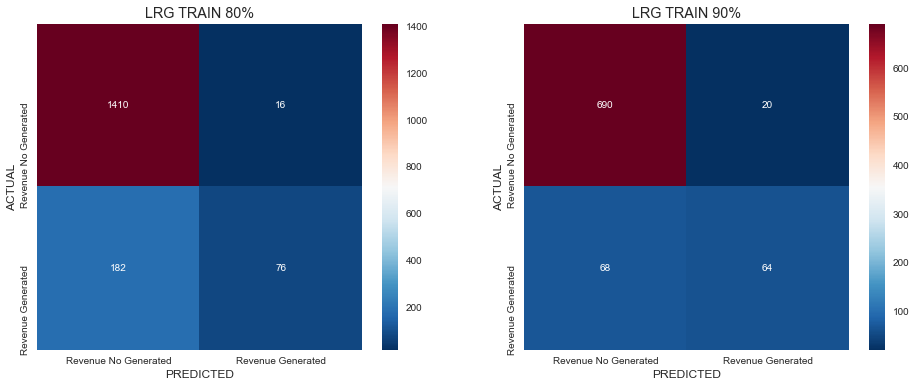

In [427]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax1, cmap = 'RdBu_r')
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax2, cmap = 'RdBu_r')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('LRG TRAIN 80%'), ax2.set_title('LRG TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [428]:
pd.concat([report_LRG, report_LRG1], keys = ['LRG TRAIN 80%', 'LRG TRAIN 90%'])

precision    recall  f1-score      support
LRG TRAIN 80% Revenue No Generated   0.885678  0.988780  0.934394  1426.000000
              Revenue Generated      0.826087  0.294574  0.434286   258.000000
              accuracy               0.882423  0.882423  0.882423     0.882423
              macro avg              0.855883  0.641677  0.684340  1684.000000
              weighted avg           0.876549  0.882423  0.857774  1684.000000
LRG TRAIN 90% Revenue No Generated   0.910290  0.971831  0.940054   710.000000
              Revenue Generated      0.761905  0.484848  0.592593   132.000000
              accuracy               0.895487  0.895487  0.895487     0.895487
              macro avg              0.836097  0.728340  0.766324   842.000000
              weighted avg           0.887028  0.895487  0.885583   842.000000

In [429]:
# Accuracy, Precision, Recall, F1 Score

# accuracy
LRG_acc = accuracy_score(y_test, yp_LRG)
LRG1_acc = accuracy_score(y1_test, yp_LRG1)

# precision
LRG_prec = precision_score(y_test,  yp_LRG, pos_label = 1)
LRG1_prec = precision_score(y1_test, yp_LRG1, pos_label = 1)

# recall
LRG_rec = recall_score(y_test, yp_LRG, pos_label = 1)
LRG1_rec = recall_score(y1_test, yp_LRG1, pos_label = 1)

# f1 score
LRG_fsc = f1_score(y_test, yp_LRG, pos_label = 1)
LRG1_fsc = f1_score(y1_test, yp_LRG1, pos_label = 1)

In [430]:
LRG_score_comp = pd.DataFrame({'LRG 80' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc], 
                               'LRG 90' : [LRG1_acc, LRG1_prec, LRG1_rec, LRG1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
LRG_score_comp

,LRG 80,LRG 90
ACCURACY,0.882423,0.895487
PRECISION,0.826087,0.761905
RECALL,0.294574,0.484848
F1 SCORE,0.434286,0.592593


> By seeing above result, we can infer that the Logistic Regression model's Accuracy, Precision, Recall and F1 Score performed better on 80% train data. Therefore on Logistic Regression model, we'll choose the 80% train one.

<AxesSubplot:>

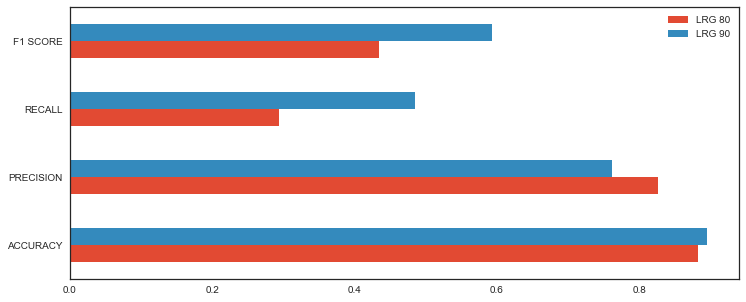

In [431]:
LRG_score_comp.plot(kind = 'barh', figsize = (12,5))

#### Random Forest Comparison

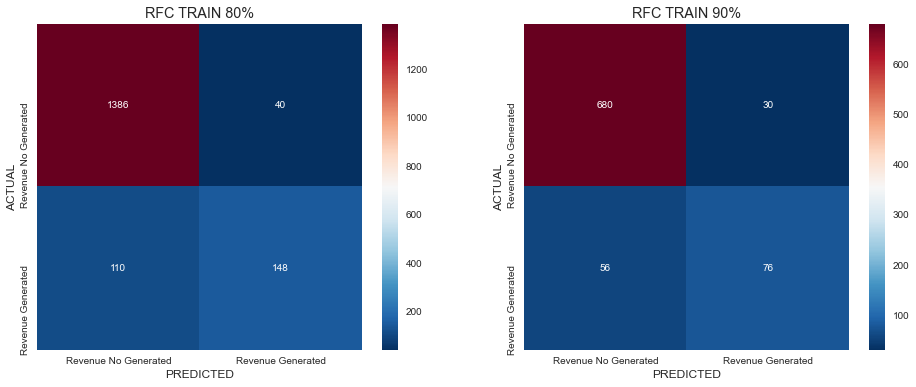

In [432]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax1, cmap = 'RdBu_r')
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax2, cmap = 'RdBu_r')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RFC TRAIN 80%'), ax2.set_title('RFC TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [433]:
pd.concat([report_RFC, report_RFC1], keys = ['RFC TRAIN 80%', 'RFC TRAIN 90%'])

precision    recall  f1-score      support
RFC TRAIN 80% Revenue No Generated   0.926471  0.971950  0.948665  1426.000000
              Revenue Generated      0.787234  0.573643  0.663677   258.000000
              accuracy               0.910926  0.910926  0.910926     0.910926
              macro avg              0.856852  0.772796  0.806171  1684.000000
              weighted avg           0.905139  0.910926  0.905003  1684.000000
RFC TRAIN 90% Revenue No Generated   0.923913  0.957746  0.940526   710.000000
              Revenue Generated      0.716981  0.575758  0.638655   132.000000
              accuracy               0.897862  0.897862  0.897862     0.897862
              macro avg              0.820447  0.766752  0.789591   842.000000
              weighted avg           0.891472  0.897862  0.893202   842.000000

In [434]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
RFC_acc = accuracy_score(y_test, yp_RFC)
RFC1_acc = accuracy_score(y1_test, yp_RFC1)

# precision
RFC_prec = precision_score(y_test, yp_RFC, pos_label = 1)
RFC1_prec = precision_score(y1_test, yp_RFC1, pos_label = 1)

# recall
RFC_rec = recall_score(y_test, yp_RFC, pos_label = 1)
RFC1_rec = recall_score(y1_test, yp_RFC1, pos_label = 1)

# f1 score
RFC_fsc = f1_score(y_test, yp_RFC, pos_label = 1)
RFC1_fsc = f1_score(y1_test, yp_RFC1, pos_label = 1)

In [435]:
RFC_score_comp = pd.DataFrame({'RFC 80' : [RFC_acc, RFC_prec, RFC_rec, RFC_fsc], 
                               'RFC 90' : [RFC1_acc, RFC1_prec, RFC1_rec, RFC1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
RFC_score_comp

,RFC 80,RFC 90
ACCURACY,0.910926,0.897862
PRECISION,0.787234,0.716981
RECALL,0.573643,0.575758
F1 SCORE,0.663677,0.638655


> The Random Forest model are better performed using 80% train data, although the Precision and F1 Score are better on 90% train data, the Accuracy and Recall of this model are better on 80% data. Since we're focusing the model on getting the best recall, therefore we choose the 80% one.

<AxesSubplot:>

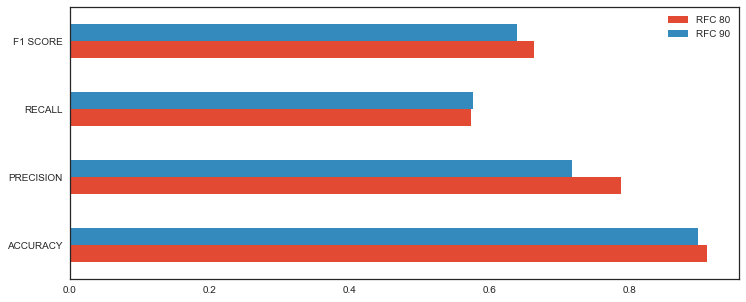

In [436]:
RFC_score_comp.plot(kind = 'barh', figsize = (12,5))

#### Decision Tree Comparison

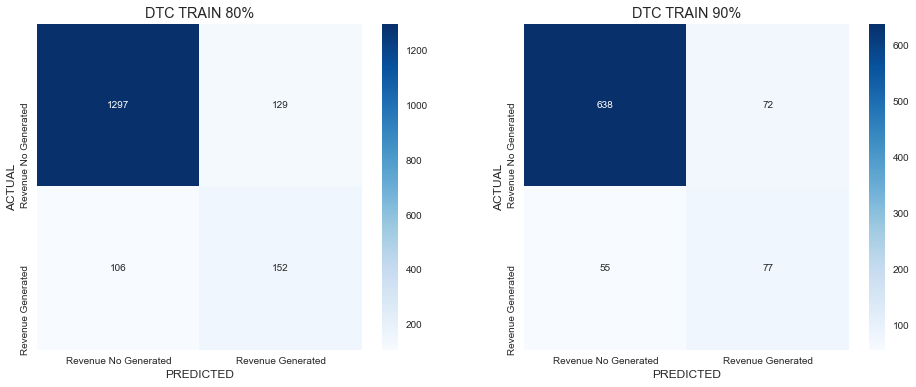

In [437]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_DTC, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_DTC1, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('DTC TRAIN 80%'), ax2.set_title('DTC TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [438]:
pd.concat([report_DTC, report_DTC1], keys = ['DTC TRAIN 80%', 'DTC TRAIN 90%'])

precision    recall  f1-score      support
DTC TRAIN 80% Revenue No Generated   0.924448  0.909537  0.916932  1426.000000
              Revenue Generated      0.540925  0.589147  0.564007   258.000000
              accuracy               0.860451  0.860451  0.860451     0.860451
              macro avg              0.732686  0.749342  0.740470  1684.000000
              weighted avg           0.865689  0.860451  0.862861  1684.000000
DTC TRAIN 90% Revenue No Generated   0.920635  0.898592  0.909480   710.000000
              Revenue Generated      0.516779  0.583333  0.548043   132.000000
              accuracy               0.849169  0.849169  0.849169     0.849169
              macro avg              0.718707  0.740962  0.728761   842.000000
              weighted avg           0.857323  0.849169  0.852817   842.000000

In [439]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
DTC_acc = accuracy_score(y_test, yp_DTC)
DTC1_acc = accuracy_score(y1_test, yp_DTC1)

# precision
DTC_prec = precision_score(y_test, yp_DTC, pos_label = 1)
DTC1_prec = precision_score(y1_test, yp_DTC1, pos_label = 1)

# recall
DTC_rec = recall_score(y_test, yp_DTC, pos_label = 1)
DTC1_rec = recall_score(y1_test, yp_DTC1, pos_label = 1)

# f1 score
DTC_fsc = f1_score(y_test, yp_DTC, pos_label = 1)
DTC1_fsc = f1_score(y1_test, yp_DTC1, pos_label = 1)

In [440]:
DTC_score_comp = pd.DataFrame({'DTC 80' : [DTC_acc, DTC_prec, DTC_rec, DTC_fsc], 
                               'DTC 90' : [DTC1_acc, DTC1_prec, DTC1_rec, DTC1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
DTC_score_comp

,DTC 80,DTC 90
ACCURACY,0.860451,0.849169
PRECISION,0.540925,0.516779
RECALL,0.589147,0.583333
F1 SCORE,0.564007,0.548043


<AxesSubplot:>

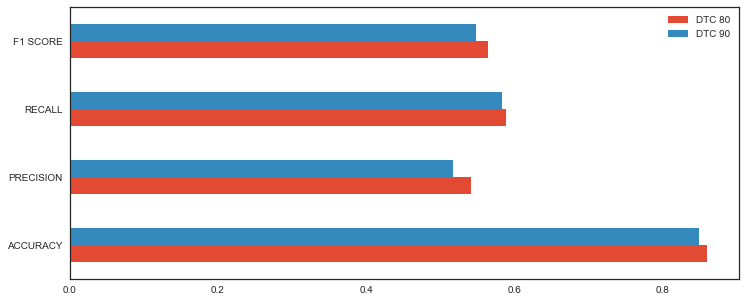

In [441]:
DTC_score_comp.plot(kind = 'barh', figsize = (12,5))

#### K-Nearest Neighbors Comparison

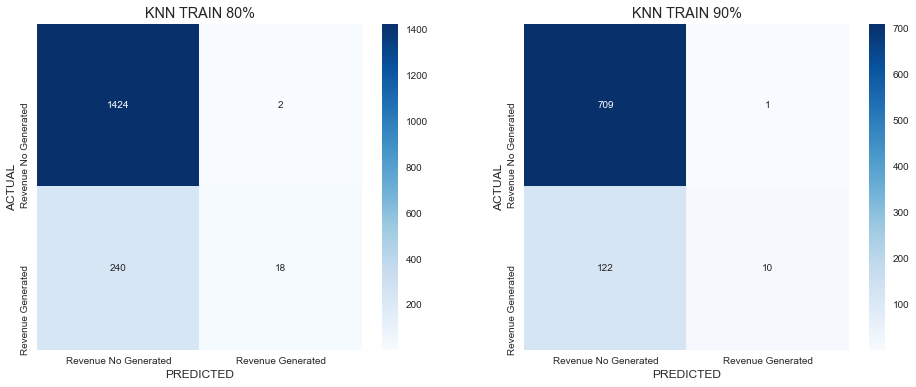

In [442]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('KNN TRAIN 80%'), ax2.set_title('KNN TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [443]:
pd.concat([report_KNN, report_KNN1], keys = ['KNN TRAIN 80%', 'KNN TRAIN 90%'])

precision    recall  f1-score      support
KNN TRAIN 80% Revenue No Generated   0.855769  0.998597  0.921683  1426.000000
              Revenue Generated      0.900000  0.069767  0.129496   258.000000
              accuracy               0.856295  0.856295  0.856295     0.856295
              macro avg              0.877885  0.534182  0.525590  1684.000000
              weighted avg           0.862546  0.856295  0.800315  1684.000000
KNN TRAIN 90% Revenue No Generated   0.853189  0.998592  0.920182   710.000000
              Revenue Generated      0.909091  0.075758  0.139860   132.000000
              accuracy               0.853919  0.853919  0.853919     0.853919
              macro avg              0.881140  0.537175  0.530021   842.000000
              weighted avg           0.861953  0.853919  0.797851   842.000000

In [444]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
KNN_acc = accuracy_score(y_test, yp_KNN)
KNN1_acc = accuracy_score(y1_test, yp_KNN1)

# precision
KNN_prec = precision_score(y_test, yp_KNN, pos_label = 1)
KNN1_prec = precision_score(y1_test, yp_KNN1, pos_label = 1)

# recall
KNN_rec = recall_score(y_test, yp_KNN, pos_label = 1)
KNN1_rec = recall_score(y1_test, yp_KNN1, pos_label = 1)

# f1 score
KNN_fsc = f1_score(y_test, yp_KNN, pos_label = 1)
KNN1_fsc = f1_score(y1_test, yp_KNN1, pos_label = 1)

In [445]:
KNN_score_comp = pd.DataFrame({'KNN 80' : [KNN_acc, KNN_prec, KNN_rec, KNN_fsc], 
                               'KNN 90' : [KNN1_acc, KNN1_prec, KNN1_rec, KNN1_fsc]}, 
                              index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
KNN_score_comp

,KNN 80,KNN 90
ACCURACY,0.856295,0.853919
PRECISION,0.900000,0.909091
RECALL,0.069767,0.075758
F1 SCORE,0.129496,0.139860


> The KNN model are obviously better performed on 80% train data, as the model scores are higher on this 80% data.

<AxesSubplot:>

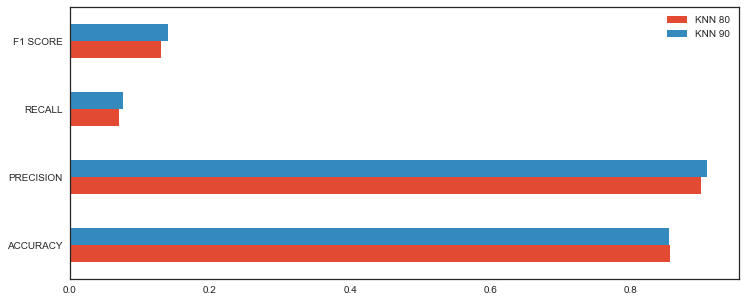

In [446]:
KNN_score_comp.plot(kind = 'barh', figsize = (12,5))

### BEST MODEL SUMMARY

> Now that we've summarized all the models we need to predict, therefore in this next step, we will seek for our best model by comparing all the result from each models in each data train splitting (80% and 90%). 

>As the F1 score conveys the balance between the precision and the recall, thus rather than accuracy, we would pick the models with the highest F1 score from each of the categories.

> - For Logistic Regression model, we will pick the 90% category. 
> - For Random Forest Classifier model, we will pick the 80% category.
> - For Decision Tree Classifier model, we will pick the 80% category.
> - For K Nearest Neighbors method, we will pick the 90% category.

In [447]:
model_best = pd.concat([report_LRG1, report_RFC, report_DTC, report_KNN1], keys = ['LRG 90', 'RFC 80', 'DTC 80', 'KNN 90'])
model_best

precision    recall  f1-score      support
LRG 90 Revenue No Generated   0.910290  0.971831  0.940054   710.000000
       Revenue Generated      0.761905  0.484848  0.592593   132.000000
       accuracy               0.895487  0.895487  0.895487     0.895487
       macro avg              0.836097  0.728340  0.766324   842.000000
       weighted avg           0.887028  0.895487  0.885583   842.000000
RFC 80 Revenue No Generated   0.926471  0.971950  0.948665  1426.000000
       Revenue Generated      0.787234  0.573643  0.663677   258.000000
       accuracy               0.910926  0.910926  0.910926     0.910926
       macro avg              0.856852  0.772796  0.806171  1684.000000
       weighted avg           0.905139  0.910926  0.905003  1684.000000
DTC 80 Revenue No Generated   0.924448  0.909537  0.916932  1426.000000
       Revenue Generated      0.540925  0.589147  0.564007   258.000000
       accuracy               0.860451  0.860451  0.860451     0.860451
       macro avg              0.732686  0.749342  0.740470  1684.000000
       weighted avg           0.865689  0.860451  0.862861  1684.000000
KNN 90 Revenue No Generated   0.853189  0.998592  0.920182   710.000000
       Revenue Generated      0.909091  0.075758  0.139860   132.000000
       accuracy               0.853919  0.853919  0.853919     0.853919
       macro avg              0.881140  0.537175  0.530021   842.000000
       weighted avg           0.861953  0.853919  0.797851   842.000000

In [448]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
LRG_acc = accuracy_score(y1_test, yp_LRG1)
RFC_acc = accuracy_score(y_test, yp_RFC)
DTC_acc = accuracy_score(y_test, yp_DTC)
KNN1_acc = accuracy_score(y1_test, yp_KNN1)

# precision
LRG_prec = precision_score(y1_test, yp_LRG1, pos_label = 1)
RFC_prec = precision_score(y_test, yp_RFC, pos_label = 1)
DTC_prec = precision_score(y_test, yp_DTC, pos_label = 1)
KNN1_prec = precision_score(y1_test, yp_KNN1, pos_label = 1)

# recall
LRG_rec = recall_score(y1_test, yp_LRG1, pos_label = 1)
RFC_rec = recall_score(y_test, yp_RFC, pos_label = 1)
DTC_rec = recall_score(y_test, yp_DTC, pos_label = 1)
KNN1_rec = recall_score(y1_test, yp_KNN1, pos_label = 1)

# f1 score
LRG_fsc = f1_score(y1_test, yp_LRG1, pos_label = 1)
RFC_fsc = f1_score(y_test, yp_RFC, pos_label = 1)
DTC_fsc = f1_score(y_test, yp_DTC, pos_label = 1)
KNN1_fsc = f1_score(y1_test, yp_KNN1, pos_label = 1)

In [449]:
final_score_comp = pd.DataFrame({'LRG 90' : [LRG1_acc, LRG1_prec, LRG1_rec, LRG1_fsc],
                                 'RFC 80' : [RFC_acc, RFC_prec, RFC_rec, RFC_fsc],
                                 'DTC 80' : [DTC_acc, DTC_prec, DTC_rec, DTC_fsc],
                                 'KNN 90' : [KNN1_acc, KNN1_prec, KNN1_rec, KNN1_fsc]}, 
                                index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
final_score_comp

,LRG 90,RFC 80,DTC 80,KNN 90
ACCURACY,0.895487,0.910926,0.860451,0.853919
PRECISION,0.761905,0.787234,0.540925,0.909091
RECALL,0.484848,0.573643,0.589147,0.075758
F1 SCORE,0.592593,0.663677,0.564007,0.139860


> Seeing the result, we can see that the Random Forest model is the best model out of four models.

<AxesSubplot:>

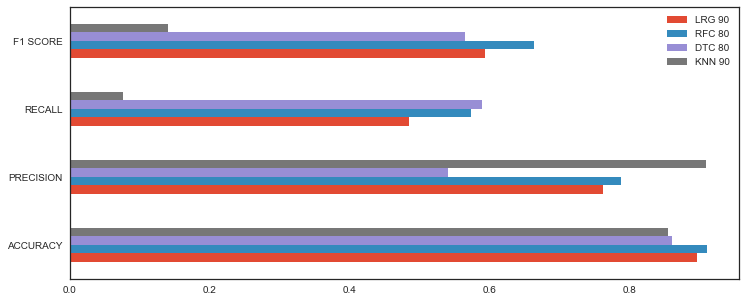

In [450]:
final_score_comp.plot(kind = 'barh', figsize = (12,5))

> Now we've got our four best models for our case. But out of all models, I think the best is using **Random Forest Model** as it is most stable, no overfitting in both categories. Since in this business case we need to predict Customer might be purchased or not, so it would be best if we choose the models with a high **Recall** apart from a high **Accuracy**, **Precision** and also **F1 Score**. 

> So to summarize : This model have an **Accuracy of 91.2%**, correctly **predict 78.6% of its total predictions on the Income and 86% on not Income**. This model also having **Recall of 58.5% on the Income, and 90% on not Income.** I say that this is a good model, the best out of four.

#### Random Forest with RandomSearch Comparison

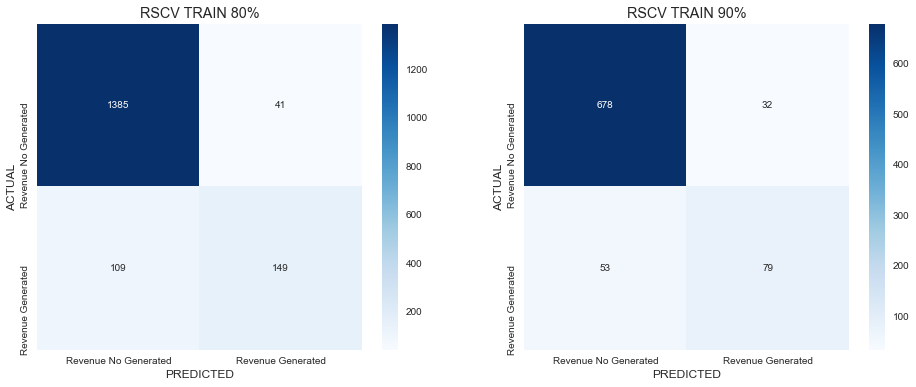

In [451]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_rfc_rs1, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_rfc_rs, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RSCV TRAIN 80%'), ax2.set_title('RSCV TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [452]:
pd.concat([report_RS, report_RS1], keys = ['RSCV TRAIN 80%', 'RSCV TRAIN 90%'])

precision    recall  f1-score  \
RSCV TRAIN 80% Revenue No Generated   0.927041  0.971248  0.948630   
               Revenue Generated      0.784211  0.577519  0.665179   
               accuracy               0.910926  0.910926  0.910926   
               macro avg              0.855626  0.774384  0.806904   
               weighted avg           0.905159  0.910926  0.905203   
RSCV TRAIN 90% Revenue No Generated   0.927497  0.954930  0.941013   
               Revenue Generated      0.711712  0.598485  0.650206   
               accuracy               0.899050  0.899050  0.899050   
               macro avg              0.819604  0.776707  0.795609   
               weighted avg           0.893668  0.899050  0.895423   

                                         support  
RSCV TRAIN 80% Revenue No Generated  1426.000000  
               Revenue Generated      258.000000  
               accuracy                 0.910926  
               macro avg             1684.000000  
               weighted avg          1684.000000  
RSCV TRAIN 90% Revenue No Generated   710.000000  
               Revenue Generated      132.000000  
               accuracy                 0.899050  
               macro avg              842.000000  
               weighted avg           842.000000

#### Random Forest with GridSearch Comparison

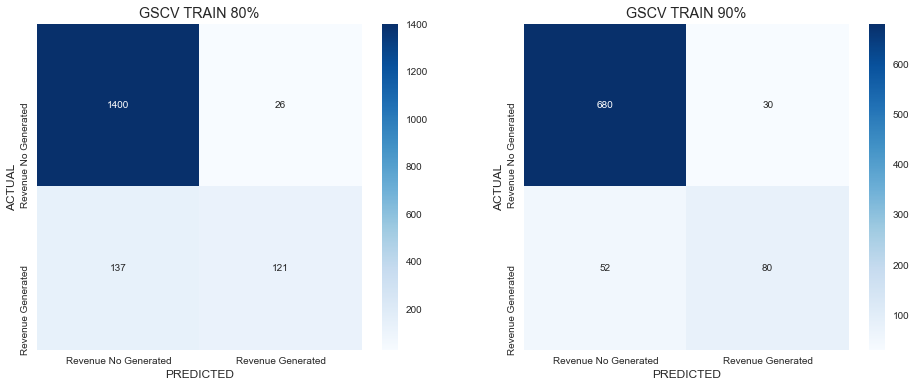

In [453]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_rfc_gs1, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_rfc_gs, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('GSCV TRAIN 80%'), ax2.set_title('GSCV TRAIN 90%')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [454]:
pd.concat([report_GC1, report_GS], keys = ['GSCV TRAIN 80%', 'GSCV TRAIN 90%'])

precision    recall  f1-score  \
GSCV TRAIN 80% Revenue No Generated   0.928962  0.957746  0.943135   
               Revenue Generated      0.727273  0.606061  0.661157   
               accuracy               0.902613  0.902613  0.902613   
               macro avg              0.828117  0.781904  0.802146   
               weighted avg           0.897343  0.902613  0.898929   
GSCV TRAIN 90% Revenue No Generated   0.909326  0.984572  0.945455   
               Revenue Generated      0.842857  0.457364  0.592965   
               accuracy               0.903800  0.903800  0.903800   
               macro avg              0.876092  0.720968  0.769210   
               weighted avg           0.899143  0.903800  0.891451   

                                         support  
GSCV TRAIN 80% Revenue No Generated   710.000000  
               Revenue Generated      132.000000  
               accuracy                 0.902613  
               macro avg              842.000000  
               weighted avg           842.000000  
GSCV TRAIN 90% Revenue No Generated  1426.000000  
               Revenue Generated      258.000000  
               accuracy                 0.903800  
               macro avg             1684.000000  
               weighted avg          1684.000000

> Finally we've finished this part, the best model is **Random Forest with hyperparameter tuning RandomSearch at split 80%**, as it is most stable and no overfitting. Since in this business case we need to predict Customer might be purchased or not, so it would be best if we choose the models with a high **Recall** apart from a high **Accuracy**, **Precision** and also **F1 Score**.

##### Note that in this part, we are using all features for these models. In the next section, we will use these three models to predict but using **Feature Selection** to select what features best for our models. But, Random Forest are sometimes better performed using unscaled data. Therefore we'll at least check it first in order to find it out.

In [456]:
df_new = df.copy()

In [457]:
df_new = pd.get_dummies(df_new, drop_first = True)

In [458]:
df_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Administrative_1,...,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
4,0.0,0.0,627.500000,0.020000,0.050000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,154.216667,0.015789,0.024561,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0.0,0.0,738.000000,0.000000,0.022222,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0.0,0.0,395.000000,0.000000,0.066667,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,0.0,0.0,407.750000,0.018750,0.025833,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### NEW MODEL PREPARATION

In [459]:
X2 = df_new.drop(columns = ['Revenue'])
y2 = df_new['Revenue'].values

#### FITTING MODEL - UNSCALED DATA RANDOM FOREST

In [460]:
# Split data

X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, train_size = 0.8, random_state = 42)

# Model

RFC2 = RandomForestClassifier().fit(X2_train, y2_train)

# Hyperparameter

RFC2_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = 10).fit(X2_train, y2_train)

# train model score

RFC2_score_tr = RFC2.score(X2_train,y2_train)
RFC2_best_score_tr = RFC2_best.score(X2_train,y2_train)

# test model score

RFC2_score = RFC2.score(X2_test,y2_test)
RFC2_best_score = RFC2_best.score(X2_test,y2_test)

In [461]:
RF_train_score = pd.DataFrame({'Normal': [RFC2_score_tr],
                               'Hyper' : [RFC2_best_score_tr]})

RF_test_score = pd.DataFrame({'Normal': [RFC2_score],
                              'Hyper' : [RFC2_best_score]})

In [462]:
pd.concat([RF_train_score, RF_test_score], keys = ['RF Train Score', 'RF Test Score'])

,,Normal,Hyper
RF Train Score,0,1.000000,0.878936
RF Test Score,0,0.910333,0.871140


> Even with unscaled data, we're still getting that ovefitting if we're using default parameter, but we can also see that the hyperparameter tuned model rather not overfitting, I think it's a good news. I'll try to use cross validation once again to double check this.

In [463]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)

RFC2_kfold = cross_val_score(RFC2_best, X2_train, y2_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'RFC Kfold cross-val' : RFC2_kfold.tolist()})

,RFC Kfold cross-val
0,0.855976
1,0.878990
2,0.870728
3,0.881129
4,0.867013


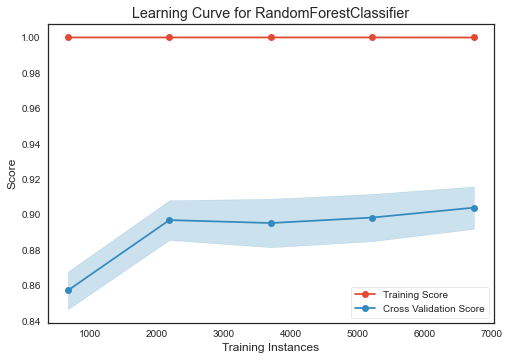

In [464]:
learning_curve(RFC2, X2, y2, scoring='accuracy')
plt.show()

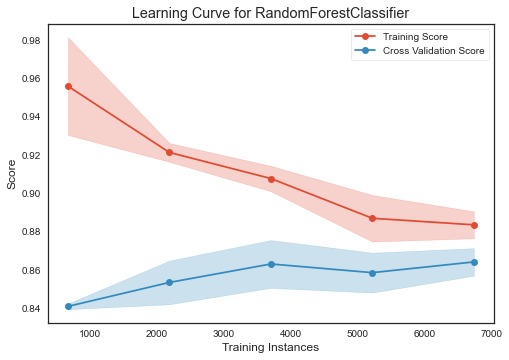

In [465]:
learning_curve(RFC2_best, X2, y2, scoring='accuracy')
plt.show()

> Again, when using hyperparameter tuned model on Random Forest seems to be overfitting but still within tolerable amount. Therefore we'll use this tuned model.

In [466]:
# Predict

yp_RFC2 = RFC2_best.predict(X2_test)

# Classification Report

report_RFC2 = pd.DataFrame(classification_report(y2_test, yp_RFC2, target_names = labels, output_dict=True)).T

#### MODEL EVALUATION - UNSCALED RANDOM FOREST

                      precision    recall  f1-score   support

Revenue No Generated       0.87      1.00      0.93      1426
   Revenue Generated       0.96      0.17      0.28       258

            accuracy                           0.87      1684
           macro avg       0.91      0.58      0.61      1684
        weighted avg       0.88      0.87      0.83      1684



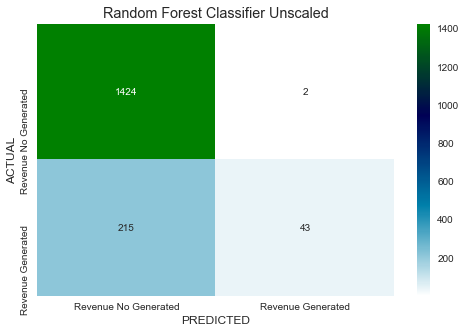

In [467]:
# confusion matrix for RandomForestClassifier

cm_RFC2 = confusion_matrix(y2_test, yp_RFC2)

print(classification_report(y2_test, yp_RFC2, target_names = labels))

# Plot confusion matrix

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC2, annot=True, fmt=".0f", ax=ax, cmap = 'ocean_r')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier Unscaled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

### CONCLUSION FOR BEST MODEL

> Finally we'll get to see which model are the best to predict this data by comparing and evaluating unscaled Random Forest model vs Scaled Random Forest Model, our best model from previous modelling.

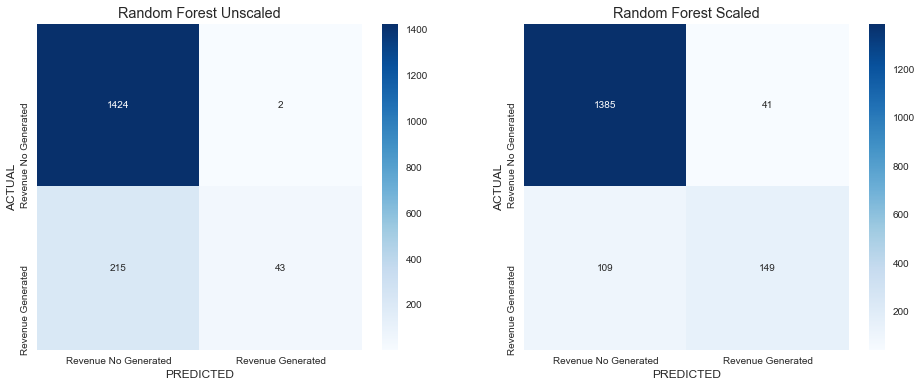

In [468]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC2, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_rfc_rs1, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('Random Forest Unscaled'), ax2.set_title('Random Forest Scaled')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [469]:
pd.concat([report_RFC2, report_RS], keys = ['RFC UNSCALED', 'RFC SCALED'])

precision    recall  f1-score      support
RFC UNSCALED Revenue No Generated   0.868822  0.998597  0.929201  1426.000000
             Revenue Generated      0.955556  0.166667  0.283828   258.000000
             accuracy               0.871140  0.871140  0.871140     0.871140
             macro avg              0.912189  0.582632  0.606515  1684.000000
             weighted avg           0.882111  0.871140  0.830325  1684.000000
RFC SCALED   Revenue No Generated   0.927041  0.971248  0.948630  1426.000000
             Revenue Generated      0.784211  0.577519  0.665179   258.000000
             accuracy               0.910926  0.910926  0.910926     0.910926
             macro avg              0.855626  0.774384  0.806904  1684.000000
             weighted avg           0.905159  0.910926  0.905203  1684.000000

In [471]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
RFC_acc = accuracy_score(y_test, y_rs)
RFC2_acc = accuracy_score(y2_test, yp_RFC2)

# precision
RFC_prec = precision_score(y_test, y_rs, pos_label = 1)
RFC2_prec = precision_score(y2_test, yp_RFC2, pos_label = 1)

# recall
RFC_rec = recall_score(y_test, y_rs, pos_label = 1)
RFC2_rec = recall_score(y2_test, yp_RFC2, pos_label = 1)

# f1 score
RFC_fsc = f1_score(y_test, y_rs, pos_label = 1)
RFC2_fsc = f1_score(y2_test, yp_RFC2, pos_label = 1)

In [472]:
RFC_vs_RFC2 = pd.DataFrame({'RFC UNSC' : [RFC2_acc, RFC2_prec, RFC2_rec, RFC2_fsc], 
                           'RFC SCL' : [RFC_acc, RFC_prec, RFC_rec, RFC_fsc]}, 
                          index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
RFC_vs_RFC2

,RFC UNSC,RFC SCL
ACCURACY,0.871140,0.910926
PRECISION,0.955556,0.784211
RECALL,0.166667,0.577519
F1 SCORE,0.283828,0.665179


<AxesSubplot:>

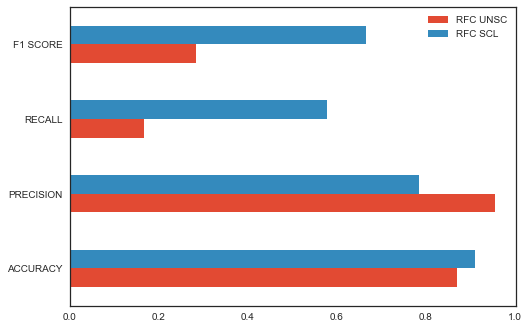

In [473]:
RFC_vs_RFC2.plot(kind = 'barh')

> **In the end, the Random Forest model using scaled data still proven a better model. Therefore we can safely say that Random Forest Model with hyperparameter tuning RandomSearch at split 80% are indeed the best model to handle this data**.

### Strategies for the client to increase sales for UI/UX Designer - Digital Marketers

> **Strategy 1:**

> > The landing page has to be very attractive and UI friendly. We can provide minimum information and lot more icon features rather than bombarding the visitor with too much information(words) which can increase the exit rates. Also the website can be transparent about the shipping charges along with the price of product in the landing page.

> **Strategy 2:**

> > Categorize each user and send personalized emails. Personalized emails can reduce retention and improve loyalty to the brand

> **Strategy 3:**

> > Introducing ad banners when the visitor tries to quit the page. The ad banner can be about discounts/offers which can make the visitor stay in the page.

> **Strategy 4:**

> > Consumers' Relationship Management and Enagaging loyal customer by giving them loyalty badge and providing unique access to the products like they can book before the official release and offers for them.

> **Strategy 5:**

> > Increase the duration of website on monthly basis by introducing monthly themed offers and products.